This code done by Mhd Taha Mhd Khaldoun Daaboul

In [221]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,  Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

Reading the data and make some data preprocessing

In [200]:
iris_data = pd.read_csv("Iris.csv")
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [201]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [202]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [203]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [204]:
iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [205]:
iris_data['PetalLengthCm'].value_counts()

PetalLengthCm
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: count, dtype: int64

In [206]:
iris_data['PetalWidthCm'].value_counts()

PetalWidthCm
0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: count, dtype: int64

In [207]:
iris_data['SepalLengthCm'].value_counts()

SepalLengthCm
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [208]:
iris_data['SepalWidthCm'].value_counts()

SepalWidthCm
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64

In [209]:
iris_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [210]:
pd.DataFrame(iris_data)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Data visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2496\2973548411.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=species_counts.index, y=species_counts.values, palette=["blue", "red", "pink"])


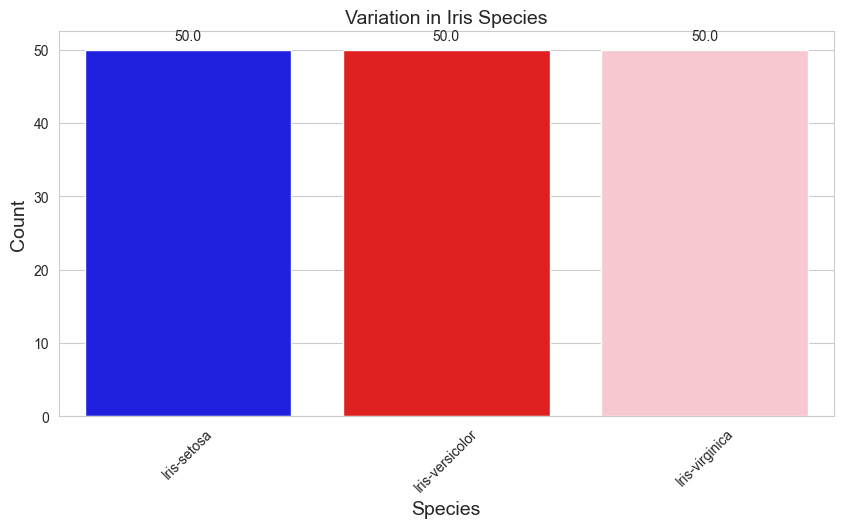

In [211]:
species_counts = iris_data['Species'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 5))
ax = sb.barplot(x=species_counts.index, y=species_counts.values, palette=["blue", "red", "pink"])

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.title("Variation in Iris Species", fontsize=14)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

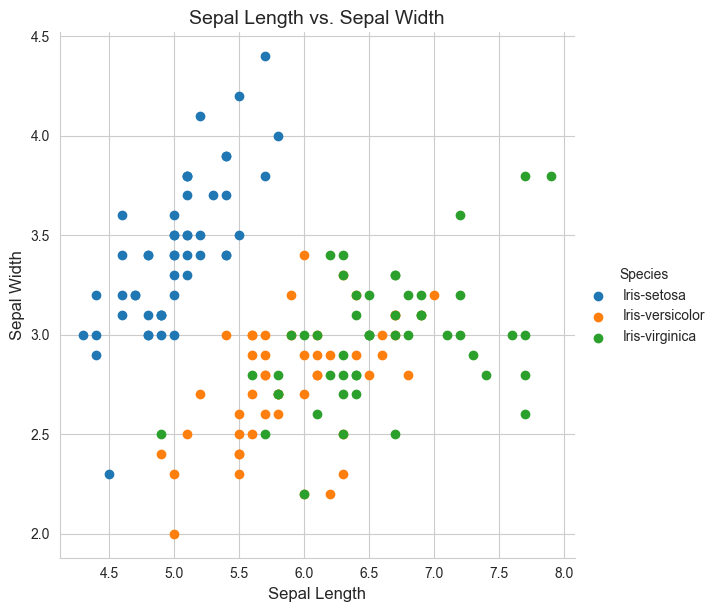

In [212]:
# Set the style
sb.set_style("whitegrid")

# Create the FacetGrid with scatter plot
g = sb.FacetGrid(iris_data, hue="Species", height=6)
g.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

# Adjust labels and title
plt.title("Sepal Length vs. Sepal Width", fontsize=14)
plt.xlabel("Sepal Length", fontsize=12)
plt.ylabel("Sepal Width", fontsize=12)
plt.show()

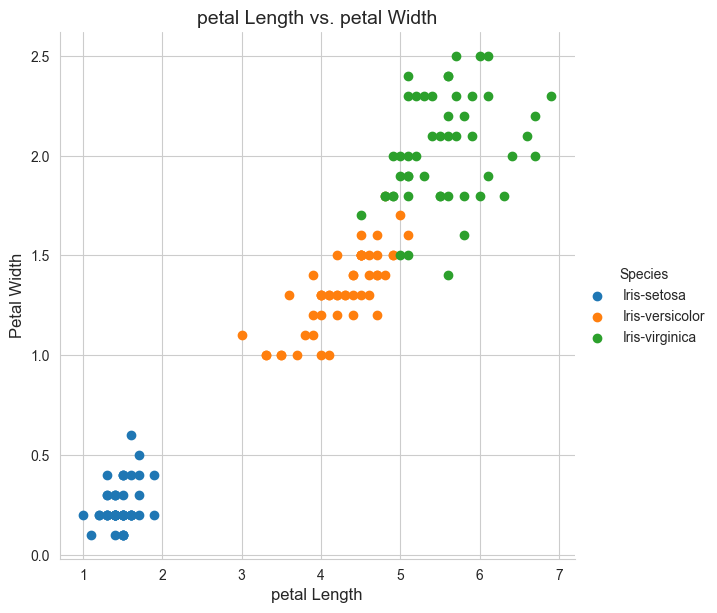

In [213]:
# Set the style
sb.set_style("whitegrid")

# Create the FacetGrid with scatter plot
g = sb.FacetGrid(iris_data, hue="Species", height=6)
g.map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm').add_legend()

# Adjust labels and title
plt.title("petal Length vs. petal Width", fontsize=14)
plt.xlabel("petal Length", fontsize=12)
plt.ylabel("Petal Width", fontsize=12)
plt.show()

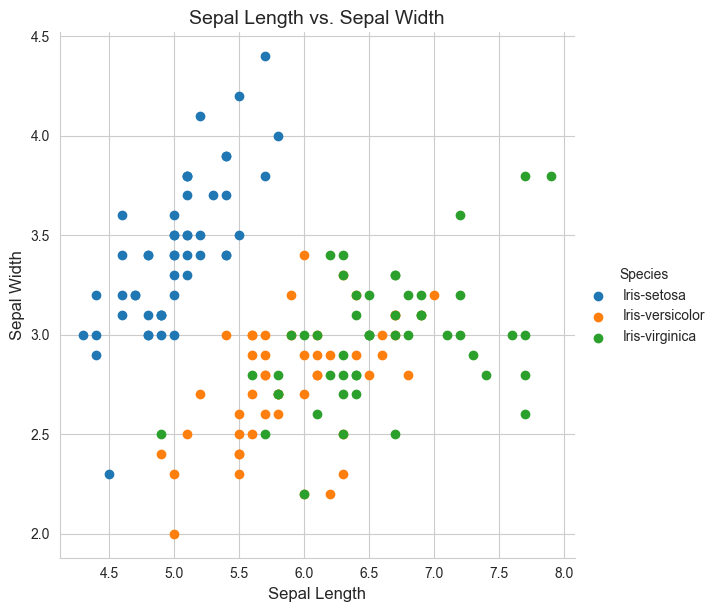

In [214]:
# Set the style
sb.set_style("whitegrid")

# Create the FacetGrid with scatter plot
g = sb.FacetGrid(iris_data, hue="Species", height=6)
g.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

# Adjust labels and title
plt.title("Sepal Length vs. Sepal Width", fontsize=14)
plt.xlabel("Sepal Length", fontsize=12)
plt.ylabel("Sepal Width", fontsize=12)
plt.show()

Trainig the data and splite it

In [215]:
x = iris_data.drop(columns=['Species'])  # Features
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [216]:
y = iris_data['Species']  # Target

# Use LabelEncoder to encode categorical target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the target variable
y_categorical = to_categorical(y_encoded)
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [217]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [218]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


In [ ]:
# Compile the model with F1 score metric
def f1_metric(y_true, y_pred):
    y_pred_labels = np.argmax(y_pred, axis=1)
    f1 = f1_score(np.argmax(y_true, axis=1), y_pred_labels, average='weighted')
    return f1

Training the data on nn model

In [228]:
# Build the model
model = Sequential()
model.add(Dense(10, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.25, callbacks=[early_stop])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')



Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4102 - loss: 1.1543 - val_accuracy: 0.6333 - val_loss: 0.9693
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4356 - loss: 1.1892 - val_accuracy: 0.6333 - val_loss: 0.9530
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4231 - loss: 1.1893 - val_accuracy: 0.6333 - val_loss: 0.9360
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4017 - loss: 1.0642 - val_accuracy: 0.6333 - val_loss: 0.9238
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4046 - loss: 1.1404 - val_accuracy: 0.6333 - val_loss: 0.9076
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4500 - loss: 1.0385 - val_accuracy: 0.6333 - val_loss: 0.8920
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4220 - loss: 1.0432 - val_accuracy: 0.6333 - val_loss: 0.8775
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3796 - loss: 1.0345 - val_accuracy: 0.6333 - val_loss: 0.8667

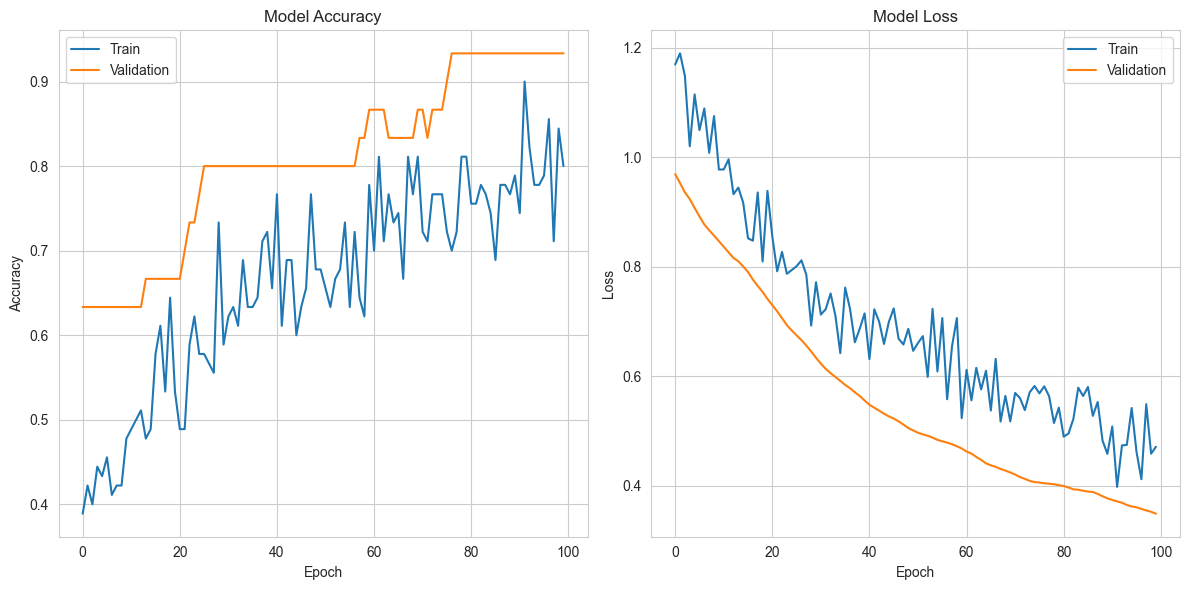

In [229]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [233]:
f1_score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test F1 score: {f1_score}')

Test F1 score: [0.26933103799819946, 0.9333333373069763]
